In [1]:
from loica import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rep = GeneticNetwork()

alpha1 = 1e3
alpha2 = 1e2
alpha3 = 1e2
gamma1 = 1
gamma2 = 1
gamma3 = 1
nx = 500

laci = Regulator(name='LacI', degradation_rate=gamma1, init_concentration=np.zeros((nx,)))
tetr = Regulator(name='TetR', degradation_rate=gamma2, init_concentration=np.zeros((nx,)))
ci = Regulator(name='cI', degradation_rate=gamma3, init_concentration=np.zeros((nx,))+5)
rep.add_regulator(laci)
rep.add_regulator(tetr)
rep.add_regulator(ci)

sfp1 = Reporter(name='CFP', degradation_rate=gamma1, init_concentration=np.zeros((nx,)))
rep.add_reporter(sfp1)
sfp2 = Reporter(name='YFP', degradation_rate=gamma2, init_concentration=np.zeros((nx,)))
rep.add_reporter(sfp2)
sfp3 = Reporter(name='RFP', degradation_rate=gamma3, init_concentration=np.zeros((nx,))+5)
rep.add_reporter(sfp3)

rep.add_operator(Not(input=ci, output=laci, a=alpha1, b=0, K=1, n=2))
rep.add_operator(Not(input=laci, output=tetr, a=alpha2, b=0, K=1, n=2))
rep.add_operator(Not(input=tetr, output=ci, a=alpha3, b=0, K=1, n=2))

rep.add_operator(Not(input=ci, output=sfp1, a=alpha1, b=0, K=1, n=2))
rep.add_operator(Not(input=laci, output=sfp2, a=alpha2, b=0, K=1, n=2))
rep.add_operator(Not(input=tetr, output=sfp3, a=alpha3, b=0, K=1, n=2))

In [3]:
col = Colony(rep, 1, 1)

In [4]:
kymo = col.kymograph(nx=nx, t0=0, tmax=48)

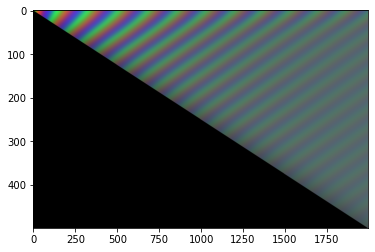

In [5]:
plt.imshow(col.map_kymo(col.norm_kymo(kymo)), aspect='auto')

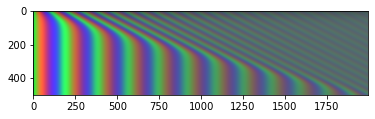

In [6]:
plt.imshow(col.norm_kymo(kymo))

In [7]:
fb = GeneticNetwork()

a = 1e4
b = 0
K = 1
n = 4
gamma = 1
nx = 500

reg = Regulator(name='Reg', degradation_rate=gamma, init_concentration=np.zeros((nx,))+5)
fb.add_regulator(reg)

sfp = Reporter(name='SFP', degradation_rate=gamma, init_concentration=np.zeros((nx,))+5)
fb.add_reporter(sfp)

fb.add_operator(Not(input=reg, output=reg, a=a, b=b, K=K, n=n))
fb.add_operator(Not(input=reg, output=sfp, a=a, b=b, K=K, n=n))

In [8]:
col = Colony(fb, 1, 1)

In [9]:
kymo = col.kymograph(nx=nx, t0=0, tmax=48)
print(kymo)

[[[5.        ]
  [5.14367393]
  [5.23934036]
  ...
  [5.49159562]
  [5.49159562]
  [5.49159562]]

 [[5.        ]
  [5.14932017]
  [5.24896357]
  ...
  [5.51652856]
  [5.51652856]
  [5.51652856]]

 [[5.        ]
  [5.15470127]
  [5.25816045]
  ...
  [5.54099385]
  [5.54099385]
  [5.54099385]]

 ...

 [[5.        ]
  [5.26391441]
  [5.45013694]
  ...
  [6.30877713]
  [6.30877713]
  [6.30877713]]

 [[5.        ]
  [5.26391441]
  [5.45013694]
  ...
  [6.30877713]
  [6.30877713]
  [6.30877713]]

 [[5.        ]
  [5.26391441]
  [5.45013694]
  ...
  [6.30877713]
  [6.30877713]
  [6.30877713]]]


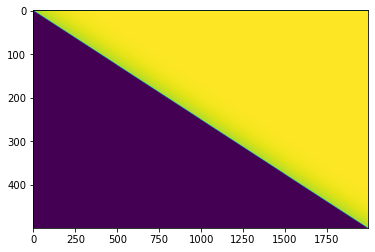

In [10]:
plt.imshow(col.map_kymo(col.norm_kymo(kymo)), aspect='auto')